In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [18]:
wine = datasets.load_wine()

In [19]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [20]:
X = wine.data  # Features
y = wine.target  # Target labels (wine type)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9444444444444444


In [25]:
importances = model.feature_importances_

# Print feature importances (optional)
for feature, importance in zip(wine.feature_names, importances):
    print(f"{feature}: {importance:.2f}")

alcohol: 0.00
malic_acid: 0.02
ash: 0.02
alcalinity_of_ash: 0.00
magnesium: 0.00
total_phenols: 0.00
flavanoids: 0.41
nonflavanoid_phenols: 0.00
proanthocyanins: 0.00
color_intensity: 0.38
hue: 0.00
od280/od315_of_diluted_wines: 0.00
proline: 0.16


[Text(0.5, 0.9, 'x[9] <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.3, 0.7, 'x[12] <= 1002.5\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.4, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[2] <= 3.07\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.7, 'x[6] <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.6, 0.8, '  False'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.8, 0.5, 'x[12] <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.7, 0.3, 'x[1] <= 3.92\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

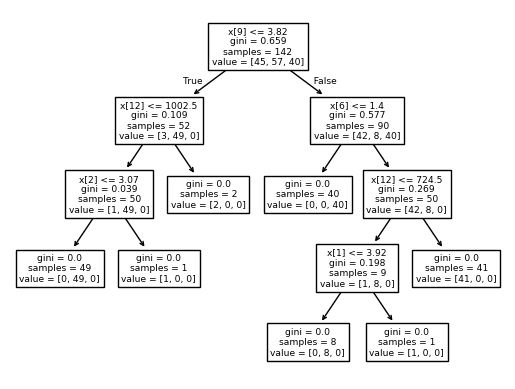

In [24]:
plot_tree(model)